<a href="https://colab.research.google.com/github/mariaimr/Monografia-UdeA/blob/first_results/Monografia_Credit_Card_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

replicating local resources


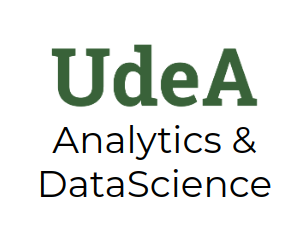

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

Image("local/imgs/udea-datascience.png")

**Materia:** Aprendizaje Automático I

**Departamento:** Especialización en Analítica y Ciencia de Datos - Posgrados en Ingeniería

**Facultad de Ingeniería - Universidad de Antioquia**

*   **Nombres Completos**: Maria Isabel Martínez Rendón
*   **Número de Cédula**: 1046912393


*   **Nombres Completos**: Santiago Felipe Rosales Guerrero
*   **Número de Cédula**: 1085334424

## Librerías y configuraciones previas


In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import math

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from scipy import stats
from sklearn.model_selection import train_test_split
import multiprocessing

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from scipy import special
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler 
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import log_loss
from collections import Counter
import statsmodels.api as sm



#support vector machine
from sklearn.svm import SVR

#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


# ==============================================================================
#mejores parametros
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Librerias para sobremuestreo
# ==============================================================================
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTEN
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import KMeansSMOTE
from sklearn.cluster import MiniBatchKMeans

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
#para procesar atípicos
from sklearn.neighbors import LocalOutlierFactor # Algoritmo LOF

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/')
#kaggle_monografia

##Funciones

In [ ]:
# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe 
# cols     : lista de columnas a graficar
# num_cols : número de columnas 
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot 
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe. 
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#
# Ejemplos:     
#    plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
#    plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
#    plot_multiples_graficas (d, ['make'], 1, 1, 'b', 'price', (16,12))
# ==============================================================================


def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):
    
    plt.rcParams['figure.figsize'] = figsize
    
    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c': 
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

In [ ]:
# Función para contruir un modelo de regresión lineal por medio de statsmodels.api

def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

#Credit Card Approval Prediction


## 1. Descripción de la base de datos

**Contexto**

Las tarjetas de crédito son un método de control de riesgos habitual en el sector financiero. Utiliza la información personal y los datos presentados por los solicitantes de tarjetas de crédito para predecir la probabilidad de que se produzcan futuros impagos y se obtengan préstamos de tarjetas de crédito. El banco puede decidir si emite una tarjeta de crédito al solicitante. Las puntuaciones de crédito pueden cuantificar objetivamente la magnitud del riesgo.
 
En general, las tarjetas de puntuación de crédito se basan en datos históricos. Una vez que se encuentran con grandes fluctuaciones económicas. Los modelos anteriores pueden perder su poder predictivo original. El modelo logístico es un método común para la puntuación de crédito. Porque Logistic es adecuado para tareas de clasificación binaria y puede calcular los coeficientes de cada característica. Para facilitar la comprensión y el funcionamiento, la tarjeta de puntuación multiplicará el coeficiente de regresión logística por un valor determinado (como 100) y lo redondeará.
 
En la actualidad, con el desarrollo de los algoritmos de aprendizaje automático. Se han introducido en la puntuación de las tarjetas de crédito más métodos de predicción, como Boosting, Random Forest y Support Vector Machines. Sin embargo, estos métodos no suelen tener una buena transparencia. Puede ser difícil proporcionar a los clientes y a los reguladores una razón para el rechazo o la aceptación.

**Información de atributos**

Base de datos 1 - **application_record:** contiene la información personal de los solicitantes y cuenta con 438.557 registros

**ID (int):** Número de cliente

**CODE_GENDER (object):** Género

**FLAG_OWN_CAR (object):** Tiene carro?

**FLAG_OWN_REALTY (object):** Tiene propiedad?

**CNT_CHILDREN (int):** Número de hijos

**AMT_INCOME_TOTAL (float):** Ingresos anuales

**NAME_INCOME_TYPE (object):** Categoría de ingresos

**NAME_EDUCATION_TYPE (object):** Nivel de educación

**NAME_FAMILY_STATUS (object):** Estado civil 

**NAME_HOUSING_TYPE (object):** Forma de vivir

**DAYS_BIRTH (int):** Cumpleaños Cuenta hacia atrás desde el día actual (0), -1 significa ayer

**DAYS_EMPLOYED (int):** Fecha de inicio del empleo Contar hacia atrás desde el día actual (0). Si es positivo, significa que la persona está actualmente desempleada.

**FLAG_MOBIL (int):** Tiene teléfono celular?

**FLAG_WORK_PHONE (int):** Tiene teléfono de trabajo?

**FLAG_PHONE (int):** Tiene teléfono?

**FLAG_EMAIL (int):** Tiene correo electrónico?

**OCCUPATION_TYPE (object):** Ocupación

**CNT_FAM_MEMBERS (float):** Tamaño de familia

La columna “OCCUPATION_TYPE” tiene 134.000 registros faltantes.

Base de datos 2 - **credit_record:** registra los comportamientos de los usuarios de la tarjeta de crédito y cuenta con 1.048.575 registros.

**ID (int):** Número de cliente

**MONTHS_BALANCE (int):** Mes de registro. El mes de los datos extraídos es el punto de partida, 0 es el mes actual, -1 es el mes anterior, y así sucesivamente

**STATUS (object):** Estado.  0: 1-29 días de atraso , 1: 30-59 días de atraso, 2: 60-89 días de atraso, 3: 90-119 días de atraso, 4: 120-149 días de atraso, 5: Deudas atrasadas o incobrables, canceladas por más de 150 días, C: cancelado ese mes, X: Sin préstamo en el mes

## 2. Carga del dataset

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/' + input('Input the directory with your Kaggle json file: ') #Dejar input vacío en caso de que se encuentre en la raíz de Drive
!kaggle datasets download -d rikdifos/credit-card-approval-prediction
!unzip \*.zip && rm *.zip

In [ ]:
banco_credit_record= pd.read_csv('credit_record.csv')
banco_appli_record= pd.read_csv('application_record.csv')

## 3. Exploración del dataset

**Dataset con información crediticia**

In [ ]:
banco_credit_record.head()

In [ ]:
banco_credit_record.info()

Se grafican los diferentes registros de la variable STATUS dado que será procesada para usarse como variable de salida en este ejercico.

In [ ]:
plt.hist(banco_credit_record["STATUS"])
plt.show()

In [ ]:
#Cantidad de registros por estado
print("Cantidad de registros por estado:")
banco_credit_record["STATUS"].value_counts()

Descripción de las categorías de la variable STATUS

0: 1-29 días de atraso

1: 30-59 días de atraso

2: 60-89 días de atraso

3: 90-119 días de atraso

4: 120-149 días de atraso

5: Deudas atrasadas o incobrables, canceladas por más de 150 días

C: cancelado ese mes

X: Sin préstamo en el mes



**Dataset con información personal de los solicitantes**

In [ ]:
banco_appli_record.head()

In [ ]:
banco_appli_record.info()

Se buscan registros duplicados y nulos.

In [ ]:
print(f"Cantidad de registros duplicados: {banco_appli_record.duplicated().sum()}")

In [ ]:
print(f"Cantidad de registros nulos:\n\n{banco_appli_record.isnull().sum()}")

Exploración de caracteres especiales por cada una de las variables

In [ ]:
lista_banco=[]
for i in banco_appli_record.columns[1:]:
  lista_banco.append({i:list(banco_appli_record[i].value_counts().index)})
display([lista_banco])

Se analiza si en la variable DAYS_BIRTH hay presencia de datos atípicos o extraños

In [ ]:
print(f" Edad máxima: {round((banco_appli_record['DAYS_BIRTH'].min())*-1/365,0)}")
print(f" Edad mínima: {round((banco_appli_record['DAYS_BIRTH'].max())*-1/365,0)}")

Se analiza el balance de las categorías en cada variable

In [ ]:
for i in banco_appli_record.columns[1:]:
  print(f"{i}\n")
  print(f"{banco_appli_record[i].value_counts()}\n")

De lo anterior, se observa que no hay presencia de caracteres o datos especiales 

Para la columna "FLAG_MOBILE", se evidencia que todos los datos son "1", por lo tanto se decide no trabajar con ella
 
Se identifica que la columna de "OCCUPATION_TYPE" tiene datos NaN

Respecto a los datos categóricos se observa un desbalanceo pero no se considera relevante

In [ ]:
del banco_appli_record["FLAG_MOBIL"]
banco_appli_record.info()

**Datos númericos** (int,float)

In [ ]:
banco_credit_num = banco_appli_record.select_dtypes(include = ["int","float"]).columns.tolist()
banco_credit_num.remove('ID')
banco_appli_record[banco_credit_num].describe()

**Datos categóricos** (objeto)

In [ ]:
banco_credit_obj = banco_appli_record.select_dtypes(include = ["object"]).columns.tolist()
banco_appli_record[banco_credit_obj].describe()

Se tratan los datos faltantes para la variable "OCCUPATION_TYPE"

In [ ]:
#####Se imputan los registros nulos de la columna "OCCUPATION_TYPE" con la moda
banco_appli_record['OCCUPATION_TYPE'].fillna(stats.mode(banco_appli_record['OCCUPATION_TYPE'])[0][0], inplace=True)
banco_appli_record[banco_credit_obj].head()

In [ ]:
banco_appli_record[banco_credit_obj].describe()

**Conclusión:** luego de probar con tres métodos diferentes (creación nueva clase, imputación por la moda y eliminación de la columna) y realizando pruebas con el modelo de "regresión logística", se observó que los mejores resultados se obtuvieron con la imputación de la moda. Además se consideró como regla de negocio que la ocupación es un factor relevante para la clasificación.

**Procesamiento para obtener variable de salida**

En la columna STATUS del dataset banco_credit_record, se asignará  “1” para los clientes con una deuda superior a los 60 días (cliente no apto) y “0” en cualquier otro caso (cliente apto)

In [ ]:
banco_credit_record['STATUS'] = np.where((banco_credit_record['STATUS'] == '2') | (banco_credit_record['STATUS'] == '3' )| (banco_credit_record['STATUS'] == '4' )| (banco_credit_record['STATUS'] == '5'), 1, 0)
banco_credit_record 

Se convierte el ID a índice y se valida si en algún mes el usuario tiene una deuda superior a 60 días y se categoriza como cliente no apto

In [ ]:
banco_credit_record_pivote = banco_credit_record.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS') #ID's SE CONVIERTEN EN INDICES
banco_credit_record_pivote['RESULTADO'] = banco_credit_record_pivote.sum(axis="columns") 
banco_credit_record_pivote['RESULTADO'] = np.where((banco_credit_record_pivote['RESULTADO'] > 0 ),1,0 ) #1 no apto, 0 apto
banco_credit_record_pivote

Se unen los 2 datasets por medio del ID

In [ ]:
banco_unido= pd.merge(banco_appli_record, banco_credit_record_pivote["RESULTADO"], on='ID', how='inner')
banco_unido.head()

In [ ]:
banco_unido.info()

Se observa que la cantidad de registros disminuye debido a que solo 36.457 de estos están relacionados por el ID 

In [ ]:
banco_credit_record['STATUS'] = np.where((banco_credit_record['STATUS'] == '2') | (banco_credit_record['STATUS'] == '3' )| (banco_credit_record['STATUS'] == '4' )| (banco_credit_record['STATUS'] == '5'), 1, 0)
banco_credit_record 

In [ ]:
banco_unido["RESULTADO"].value_counts()

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(banco_unido["RESULTADO"])
plt.ylabel('# registros')
plt.xlabel('RESULTADO')
plt.show()

De los anteriores datos, se observa el desbalanceo de la variable de salida

Se elimina la variable ID, ya que no es relevante para el modelo y se crean variables dummies de las variables categóricas

In [ ]:
del banco_unido["ID"]
banco_unido_codi = pd.get_dummies(banco_unido, drop_first=1)
banco_unido_codi.info()

**Matriz de correlación**

In [ ]:
matriz_Correlacion_banco = banco_unido_codi.corr()

plt.figure(figsize=(40,40))

ax = sns.heatmap(matriz_Correlacion_banco, annot=True, fmt='g', xticklabels = banco_unido_codi.columns, yticklabels = banco_unido_codi.columns)
plt.show()

De la matríz de correlación, se observa que:

la variable de "CNT_CHILDREN" (cantidad de hijos) tiene una alta correlación con la variable "CNT_FAM_MEMBERS" (cantidad de miembros de la familia).

la variable de "DAYS_EMPLOYED" (Días empleo/desempleo) tiene una alta correlación con la variable "NAME_INCOME_TYPE_Pensioner" (Pensionados).

Debido a la alta correlación entre las variables "CNT_FAM_MEMBERS" y "CNT_CHILDREN" (0.88) y entre las variables "NAME_INCOME_TYPE_Pensioner" y "DAYS_EMPLOYED" (0.99) se decide eliminar las características "CNT_CHILDREN" y "NAME_INCOME_TYPE_Pensioner".


In [ ]:
del banco_unido_codi["CNT_CHILDREN"]
banco_credit_num.remove('CNT_CHILDREN')
del banco_unido_codi["NAME_INCOME_TYPE_Pensioner"]

**Análisis de entropía**

se realiza el análisis de la entropía relativa

In [ ]:
caracteristicas_entropia = ["AMT_INCOME_TOTAL", "DAYS_BIRTH", "DAYS_EMPLOYED", "CNT_FAM_MEMBERS"]
features = banco_unido_codi[caracteristicas_entropia]

In [ ]:
MM = MinMaxScaler()
features_normalizado = MM.fit_transform(features)
features_normalizado = pd.DataFrame(features_normalizado, columns = features.columns)

In [ ]:
entropia_relativa = []

for _,n in enumerate(caracteristicas_entropia):
  for _,m in enumerate(caracteristicas_entropia):
    entropia_R = special.rel_entr(features_normalizado[n], features_normalizado[m])
    entropia_R = pd.DataFrame(entropia_R).replace(np.inf,0) # Reemplazamos los valores infinitos o inf por 0
    entropia_R = entropia_R.replace(-np.inf,0) # Reemplazamos los valores infinitos negativos o -inf por 0
    suma_entropia_R = entropia_R.sum()/features_normalizado.shape[0]
    entropia_relativa.append(suma_entropia_R)

In [ ]:
entropia_relativa = np.asarray(entropia_relativa)
entropia_relativa = entropia_relativa.reshape(features_normalizado.shape[1],features_normalizado.shape[1])
entropia_relativa = pd.DataFrame(entropia_relativa, index = caracteristicas_entropia, columns = caracteristicas_entropia)

plt.figure(figsize=(13,10))
ax = sns.heatmap(entropia_relativa, annot=True, fmt='g', xticklabels = caracteristicas_entropia, yticklabels = caracteristicas_entropia)
plt.show()

De lo anterior, se puede apreciar que la variable DAYS_BIRTH tiene una entropía alta en relación a las demás características, por lo que se estará analizando con la selección de características si esta variable aporta o no información.

**Selección de características**

Se realiza selección de caracteristicas por información mutua para identificar las variables que describen la base de datos.

In [ ]:
Y = banco_unido_codi['RESULTADO']
seleccion = mutual_info_classif(features, Y, discrete_features = 'auto', n_neighbors = 3)

In [ ]:
Tabla_concatenada = pd.concat([pd.DataFrame(features.columns, columns = ['Característica']), 
                               pd.DataFrame(seleccion, columns = ['Información Mutua'])], 
                              axis = 1)
Tabla_concatenada

Dados los valores de la información mutua, no se descarta la variable DAYS_BIRTH.

**Eliminación datos atípicos**

Identificación y eliminación con el método LOF (Local Outlier Factor)

In [ ]:
LOF_banco = LocalOutlierFactor(n_neighbors = 5, algorithm = 'auto', contamination = 0.05, metric = 'euclidean') 
filtrado_banco = LOF_banco.fit_predict(banco_unido_codi) # Se realiza la predicción de los datos atípicos
NOF_banco = LOF_banco.negative_outlier_factor_ 

radio_outlier_banco = (NOF_banco.max() - NOF_banco)/(NOF_banco.max() - NOF_banco.min()) # radio de detección de datos atípicos
ground_truth_banco = np.ones(len(banco_unido_codi), dtype = int) 

n_errors_banco = (filtrado_banco != ground_truth_banco).sum() # número de datos atípicos

print("Detección: ", filtrado_banco)
print("Factores atípicos negativos: ", NOF_banco)
print("Número de muestras o filas con datos atípicos: ", n_errors_banco)

Se eliminan los 1820 datos atípicos encontrados en el paso anterior

In [ ]:
pos_banco = np.where(filtrado_banco == ground_truth_banco) # Se identifican en que muestras o filas de nuestra base de datos hay presencia de datos atípicos
pos_banco = np.asarray(pos_banco)
pos_banco = np.hstack(pos_banco)

datos_sin_outliers_LOF_banco = banco_unido_codi.loc[pos_banco, :]
print(f"Número de muestras sin outliers: {datos_sin_outliers_LOF_banco.shape[0]}\n")
display(datos_sin_outliers_LOF_banco)
print(f"\nTamaño de base de datos original: {banco_unido_codi.shape}")
print(f"Tamaño de base de datos sin outliers: {datos_sin_outliers_LOF_banco.shape}") 

##Pruebas con Regresión logística con datos originales


#### Búsqueda de hiperparámetros

Se reemplazan los valores de la variable de salida por:
0 = APTO
1 = NO_APTO

In [ ]:
datos_sin_outliers_LOF_banco["RESULTADO"].replace(0,'APTO', inplace=True)
datos_sin_outliers_LOF_banco["RESULTADO"].replace(1,'NO_APTO', inplace=True)

In [ ]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(datos_sin_outliers_LOF_banco.columns)
banco_columns.remove('RESULTADO')

X = datos_sin_outliers_LOF_banco[banco_columns]
y = datos_sin_outliers_LOF_banco['RESULTADO']

In [ ]:
banco_clientes_desbalanceo = pd.concat([X, y], axis=1)
banco_clientes_desbalanceo

In [ ]:
muestra_banco = banco_clientes_desbalanceo
muestra_banco.info()

In [ ]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = muestra_banco[banco_columns]
y = muestra_banco['RESULTADO']


In [ ]:
#Datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [ ]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [ ]:
X_Completo = X
y_Completo = y

In [ ]:
logisticReg = LogisticRegression()

parameters = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'multi_class': ['ovr', 'auto', 'multinomial'], 
              'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag'],
              'class_weight': ['balanced', None]
              } 

#grid_reg_log = GridSearchCV(logisticReg, param_grid=parameters, cv=10, verbose=3)

#grid_reg_log_result = grid_reg_log.fit(X_Completo,y_Completo) 

#grid_reg_log_result

#### Validación con modelo Regresión Logística

##### Creación del modelo

In [ ]:
#best_params_reg_log = grid_reg_log_result.best_params_
#print('Best Parameters : ', best_params_reg_log)

In [ ]:
###################ELIMINAAAAAAAAAR
best_params_reg_log = {'C': 0.001, 'class_weight': None, 'multi_class': 'ovr', 'solver': 'liblinear'}

In [ ]:
X = banco_clientes_desbalanceo[banco_columns]
y = banco_clientes_desbalanceo['RESULTADO']

In [ ]:
#Datos de entrenamiento y de prueba base de datos completa
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [ ]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

Se crea el modelo con los mejores parámetros obtenidos del método anterior ('C': 100, 'class_weight': None, 'multi_class': 'multinomial', 'solver': 'newton-cg')

In [ ]:
model_reg_logistica = LogisticRegression(
    C = best_params_reg_log["C"],
    class_weight = best_params_reg_log["class_weight"], 
    multi_class = best_params_reg_log["multi_class"], 
    solver = best_params_reg_log["solver"],
    random_state = 0)

model_reg_logistica.fit(X_train, y_train)

##### Accuracy

In [ ]:
y_1 = model_reg_logistica.predict(X_test)
y_pred = model_reg_logistica.predict_proba(X_test)

In [ ]:
print("===========Accuracy Logistic Regression ================")
print(metrics.accuracy_score(y_test, y_1))

##### Balanced accuracy score

In [ ]:
y_1[y_1== 'APTO'] = 0
y_test[y_test == 'APTO'] = 0
y_1[y_1== 'NO_APTO'] = 1
y_test[y_test == 'NO_APTO'] = 1

y_test = y_test.tolist()
y_1 = y_1.tolist()

print("===========Balanced Accuracy Score ================")
print(balanced_accuracy_score(y_test, y_1))


##### Pérdida de entropía cruzada (Log Loss)

In [ ]:
y_test = np.array(y_test)
log_loss(y_test, y_pred)

##### Matriz de confusión

In [ ]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test, y_1)
conf_mat = np.round(((conf_mat/len(y_test))*100),1)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='.1f'
            , xticklabels=banco_clientes_desbalanceo['RESULTADO'].sort_values().unique()
            , yticklabels=banco_clientes_desbalanceo['RESULTADO'].sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test, y_1, target_names=banco_clientes_desbalanceo['RESULTADO'].sort_values().unique()))

##### Receiver Operating Characteristic (ROC)

In [ ]:
#Convertir y_test NO_APTO y APTO en 1 y 0
e_dataframe = pd.DataFrame(y_test)
e_dataframe.replace('NO_APTO',1, inplace=True)
e_dataframe.replace('APTO', 0,inplace=True)
arr = e_dataframe.to_numpy()

In [ ]:
fig = plt.figure(figsize=(10,6))

probs = model_reg_logistica.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(arr, probs*(1))

print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(arr, probs*(1))
plot_roc_curve(fpr, tpr)

##### Precision Recall Curve

In [ ]:
prec, recall, _ = precision_recall_curve(y_test, y_1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

## Sobremuestreo para solucionar desbalanceo

### RandomOverSampler

In [ ]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = muestra_banco[banco_columns]
y = muestra_banco['RESULTADO']

In [ ]:
sm = RandomOverSampler( random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_res))

####Busqueda de hiperparámetros 

In [ ]:
banco_clientes_sinteticos = pd.concat([X_res, y_res], axis=1)
banco_clientes_sinteticos

In [ ]:
banco_clientes_sinteticos.info()

In [ ]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = banco_clientes_sinteticos[banco_columns]
y = banco_clientes_sinteticos['RESULTADO']


In [ ]:
#Datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [ ]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [ ]:
X_Completo = X
y_Completo = y

In [ ]:
logisticReg = LogisticRegression()

parameters = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'multi_class': ['ovr', 'auto', 'multinomial'], 
              'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag'],
              'class_weight': ['balanced', None]
              } 

#grid_reg_log = GridSearchCV(logisticReg, param_grid=parameters, cv=10, verbose=3)

#grid_reg_log_result = grid_reg_log.fit(X_Completo,y_Completo) 

#grid_reg_log_result

#### Creación del modelo Con RandomOverSampler

In [ ]:
#best_params_reg_log = grid_reg_log_result.best_params_
#print('Best Parameters : ', best_params_reg_log)

In [ ]:
###################ELIMINAAAAAAAAAR
best_params_reg_log = {'C': 1000, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'solver': 'newton-cg'}

Se entrena el modelo con el 100% de los datos sintéticos y se prueba con el 100% de los datos originales

In [ ]:
X_train = X_res
y_train = y_res

X_test = muestra_banco[banco_columns]
y_test = muestra_banco['RESULTADO']

In [ ]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [ ]:
model_reg_logistica = LogisticRegression(
    C = best_params_reg_log["C"],
    class_weight = best_params_reg_log["class_weight"], 
    multi_class = best_params_reg_log["multi_class"], 
    solver = best_params_reg_log["solver"],
    random_state = 0)

model_reg_logistica.fit(X_train, y_train)

#### Accuracy

In [ ]:
y_1 = model_reg_logistica.predict(X_test)
y_pred = model_reg_logistica.predict_proba(X_test)

In [ ]:
print("===========Accuracy Logistic Regression ================")
print(metrics.accuracy_score(y_test, y_1))

#### Balanced accuracy score

In [ ]:
y_test = y_test.replace({"APTO": 0, "NO_APTO": 1})

y_1[y_1== 'APTO'] = 0
y_1[y_1== 'NO_APTO'] = 1

y_test = y_test.tolist()
y_1 = y_1.tolist()

print("===========Balanced Accuracy Score ================")
print(balanced_accuracy_score(y_test, y_1))


#### Pérdida de entropía cruzada (Log Loss)

In [ ]:
y_test = np.array(y_test)
log_loss(y_test, y_pred)

#### Matriz de confusión

In [ ]:
y_1 = ['APTO' if x==0 else 'NO_APTO' for x in y_1]
y_test = ['APTO' if x==0 else 'NO_APTO' for x in y_test]

In [ ]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test, y_1)
conf_mat = np.round(((conf_mat/len(y_test))*100),1)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='.1f'
            , xticklabels=set(y_1)
            , yticklabels=set(y_1)
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test, y_1, target_names=set(y_1)))

#### Receiver Operating Characteristic (ROC)

In [ ]:
e_dataframe = pd.DataFrame(y_test)
e_dataframe.replace('NO_APTO',1, inplace=True)
e_dataframe.replace('APTO', 0,inplace=True)
arr = e_dataframe.to_numpy()

In [ ]:
fig = plt.figure(figsize=(10,6))

probs = model_reg_logistica.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(arr, probs*(-1))

print('AUC: %.2f' % (1-auc))
fpr, tpr, thresholds = roc_curve(arr, probs*(1))
plot_roc_curve(fpr, tpr)

#### Precision Recall Curve

In [ ]:
y_1 = [0 if x== 'APTO' else 1 for x in y_1]
y_test = [0 if x== 'APTO' else 1 for x in y_test]

In [ ]:
prec, recall, _ = precision_recall_curve(y_test, y_1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

### SMOTEN

In [ ]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = muestra_banco[banco_columns]
y = muestra_banco['RESULTADO']

In [ ]:
sm = SMOTEN(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_res))

####Busqueda de hiperparámetros 

In [ ]:
banco_clientes_sinteticos = pd.concat([X_res, y_res], axis=1)
banco_clientes_sinteticos

In [ ]:
banco_clientes_sinteticos.info()

In [ ]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = banco_clientes_sinteticos[banco_columns]
y = banco_clientes_sinteticos['RESULTADO']


In [ ]:
#Datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [ ]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [ ]:
X_Completo = X
y_Completo = y

In [ ]:
logisticReg = LogisticRegression()

parameters = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'multi_class': ['ovr', 'auto', 'multinomial'], 
              'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag'],
              'class_weight': ['balanced', None]
              } 

#grid_reg_log = GridSearchCV(logisticReg, param_grid=parameters, cv=10, verbose=3)

#grid_reg_log_result = grid_reg_log.fit(X_Completo,y_Completo) 

#grid_reg_log_result

#### Creación del modelo Con SMOTEN

In [ ]:
#best_params_reg_log = grid_reg_log_result.best_params_
#print('Best Parameters : ', best_params_reg_log)

In [ ]:
###################ELIMINAAAAAAAAAR
best_params_reg_log = {'C': 0.1, 'class_weight': None, 'multi_class': 'multinomial', 'solver': 'newton-cg'}

Se entrena el modelo con el 100% de los datos sintéticos y se prueba con el 100% de los datos originales

In [ ]:
X_train = X_res
y_train = y_res

X_test = muestra_banco[banco_columns]
y_test = muestra_banco['RESULTADO']

In [ ]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [ ]:
model_reg_logistica = LogisticRegression(
    C = best_params_reg_log["C"],
    class_weight = best_params_reg_log["class_weight"], 
    multi_class = best_params_reg_log["multi_class"], 
    solver = best_params_reg_log["solver"],
    random_state = 0)

model_reg_logistica.fit(X_train, y_train)

#### Accuracy

In [ ]:
y_1 = model_reg_logistica.predict(X_test)
y_pred = model_reg_logistica.predict_proba(X_test)

In [ ]:
print("===========Accuracy Logistic Regression ================")
print(metrics.accuracy_score(y_test, y_1))

#### Balanced accuracy score

In [ ]:
y_test = y_test.replace({"APTO": 0, "NO_APTO": 1})

y_1[y_1== 'APTO'] = 0
y_1[y_1== 'NO_APTO'] = 1

y_test = y_test.tolist()
y_1 = y_1.tolist()

print("===========Balanced Accuracy Score ================")
print(balanced_accuracy_score(y_test, y_1))


#### Pérdida de entropía cruzada (Log Loss)

In [ ]:
y_test = np.array(y_test)
log_loss(y_test, y_pred)

#### Matriz de confusión

In [ ]:
y_1_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_1]
y_test_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_test]

In [ ]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test_mat, y_1_mat)
conf_mat = np.round(((conf_mat/len(y_test_mat))*100),1)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='.1f'
            , xticklabels=set(y_1_mat)
            , yticklabels=set(y_1_mat)
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test_mat, y_1_mat, target_names=set(y_1_mat)))

#### Receiver Operating Characteristic (ROC)

In [ ]:
e_dataframe = pd.DataFrame(y_test)
e_dataframe.replace('NO_APTO',1, inplace=True)
e_dataframe.replace('APTO', 0,inplace=True)
arr = e_dataframe.to_numpy()

In [ ]:
fig = plt.figure(figsize=(10,6))


probs = model_reg_logistica.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(arr, probs*(-1))

print('AUC: %.2f' % (1-auc))
fpr, tpr, thresholds = roc_curve(arr, probs*(1))
plot_roc_curve(fpr, tpr)

#### Precision Recall Curve

In [ ]:
prec, recall, _ = precision_recall_curve(y_test, y_1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

### KMeansSMOTE

In [ ]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = muestra_banco[banco_columns]
y = muestra_banco['RESULTADO']

In [ ]:
sm = KMeansSMOTE(kmeans_estimator=1, random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_res))

####Busqueda de hiperparámetros 

In [ ]:
banco_clientes_sinteticos = pd.concat([X_res, y_res], axis=1)
banco_clientes_sinteticos

In [ ]:
banco_clientes_sinteticos.info()

In [ ]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = banco_clientes_sinteticos[banco_columns]
y = banco_clientes_sinteticos['RESULTADO']


In [ ]:
#Datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [ ]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [ ]:
X_Completo = X
y_Completo = y

In [ ]:
logisticReg = LogisticRegression()

parameters = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'multi_class': ['ovr', 'auto', 'multinomial'], 
              'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag'],
              'class_weight': ['balanced', None]
              } 

#grid_reg_log = GridSearchCV(logisticReg, param_grid=parameters, cv=10, verbose=3)

#grid_reg_log_result = grid_reg_log.fit(X_Completo,y_Completo) 

#grid_reg_log_result

#### Creación del modelo Con KMeansSMOTE

In [ ]:
#best_params_reg_log = grid_reg_log_result.best_params_
#print('Best Parameters : ', best_params_reg_log)

In [ ]:
###################ELIMINAAAAAAAAAR
best_params_reg_log = {'C': 10, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'solver': 'newton-cg'}


Se entrena el modelo con el 100% de los datos sintéticos y se prueba con el 100% de los datos originales

In [ ]:
X_train = X_res
y_train = y_res

X_test = muestra_banco[banco_columns]
y_test = muestra_banco['RESULTADO']

In [ ]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [ ]:
model_reg_logistica = LogisticRegression(
    C = best_params_reg_log["C"],
    class_weight = best_params_reg_log["class_weight"], 
    multi_class = best_params_reg_log["multi_class"], 
    solver = best_params_reg_log["solver"],
    random_state = 0)

model_reg_logistica.fit(X_train, y_train)

#### Accuracy

In [ ]:
y_1 = model_reg_logistica.predict(X_test)
y_pred = model_reg_logistica.predict_proba(X_test)

In [ ]:
print("===========Accuracy Logistic Regression ================")
print(metrics.accuracy_score(y_test, y_1))

#### Balanced accuracy score

In [ ]:
y_test = y_test.replace({"APTO": 0, "NO_APTO": 1})

y_1[y_1== 'APTO'] = 0
y_1[y_1== 'NO_APTO'] = 1

y_test = y_test.tolist()
y_1 = y_1.tolist()

print("===========Balanced Accuracy Score ================")
print(balanced_accuracy_score(y_test, y_1))


#### Pérdida de entropía cruzada (Log Loss)

In [ ]:
y_test = np.array(y_test)
log_loss(y_test, y_pred)

#### Matriz de confusión

In [ ]:
y_1_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_1]
y_test_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_test]

In [ ]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test_mat, y_1_mat)
conf_mat = np.round(((conf_mat/len(y_test_mat))*100),1)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='.1f'
            , xticklabels=set(y_1_mat)
            , yticklabels=set(y_1_mat)
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test_mat, y_1_mat, target_names=set(y_1_mat)))

#### Receiver Operating Characteristic (ROC)

In [ ]:
e_dataframe = pd.DataFrame(y_test)
e_dataframe.replace('NO_APTO',1, inplace=True)
e_dataframe.replace('APTO', 0,inplace=True)
arr = e_dataframe.to_numpy()

In [ ]:
fig = plt.figure(figsize=(10,6))


probs = model_reg_logistica.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(arr, probs*(-1))

print('AUC: %.2f' % (1-auc))
fpr, tpr, thresholds = roc_curve(arr, probs*(1))
plot_roc_curve(fpr, tpr)

#### Precision Recall Curve

In [ ]:
prec, recall, _ = precision_recall_curve(y_test, y_1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

### BorderlineSMOTE

In [ ]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = muestra_banco[banco_columns]
y = muestra_banco['RESULTADO']


In [ ]:
sm = BorderlineSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_res))

####Busqueda de hiperparámetros 

In [ ]:
banco_clientes_sinteticos = pd.concat([X_res, y_res], axis=1)
banco_clientes_sinteticos

In [ ]:
banco_clientes_sinteticos.info()

In [ ]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = banco_clientes_sinteticos[banco_columns]
y = banco_clientes_sinteticos['RESULTADO']


In [ ]:
#Datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [ ]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [ ]:
X_Completo = X
y_Completo = y

In [ ]:
logisticReg = LogisticRegression()

parameters = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'multi_class': ['ovr', 'auto', 'multinomial'], 
              'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag'],
              'class_weight': ['balanced', None]
              } 

#grid_reg_log = GridSearchCV(logisticReg, param_grid=parameters, cv=10, verbose=3)

#grid_reg_log_result = grid_reg_log.fit(X_Completo,y_Completo) 

#grid_reg_log_result

#### Creación del modelo Con BorderlineSMOTE

In [ ]:
#best_params_reg_log = grid_reg_log_result.best_params_
#print('Best Parameters : ', best_params_reg_log)

In [ ]:
###################ELIMINAAAAAAAAAR
best_params_reg_log = {'C': 100, 'class_weight': None, 'multi_class': 'ovr', 'solver': 'newton-cg'}


Se entrena el modelo con el 100% de los datos sintéticos y se prueba con el 100% de los datos originales

In [ ]:
X_train = X_res
y_train = y_res

X_test = muestra_banco[banco_columns]
y_test = muestra_banco['RESULTADO']

In [ ]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [ ]:
model_reg_logistica = LogisticRegression(
    C = best_params_reg_log["C"],
    class_weight = best_params_reg_log["class_weight"], 
    multi_class = best_params_reg_log["multi_class"], 
    solver = best_params_reg_log["solver"],
    random_state = 0)

model_reg_logistica.fit(X_train, y_train)

#### Accuracy

In [ ]:
y_1 = model_reg_logistica.predict(X_test)
y_pred = model_reg_logistica.predict_proba(X_test)

In [ ]:
print("===========Accuracy Logistic Regression ================")
print(metrics.accuracy_score(y_test, y_1))

#### Balanced accuracy score

In [ ]:
y_test = y_test.replace({"APTO": 0, "NO_APTO": 1})

y_1[y_1== 'APTO'] = 0
y_1[y_1== 'NO_APTO'] = 1

y_test = y_test.tolist()
y_1 = y_1.tolist()

print("===========Balanced Accuracy Score ================")
print(balanced_accuracy_score(y_test, y_1))


#### Pérdida de entropía cruzada (Log Loss)

In [ ]:
y_test = np.array(y_test)
log_loss(y_test, y_pred)

#### Matriz de confusión

In [ ]:
y_1_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_1]
y_test_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_test]

In [ ]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test_mat, y_1_mat)
conf_mat = np.round(((conf_mat/len(y_test_mat))*100),1)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='.1f'
            , xticklabels=set(y_1_mat)
            , yticklabels=set(y_1_mat)
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test_mat, y_1_mat, target_names=set(y_1_mat)))

#### Receiver Operating Characteristic (ROC)

In [ ]:
e_dataframe = pd.DataFrame(y_test)
e_dataframe.replace('NO_APTO',1, inplace=True)
e_dataframe.replace('APTO', 0,inplace=True)
arr = e_dataframe.to_numpy()

In [ ]:
fig = plt.figure(figsize=(10,6))


probs = model_reg_logistica.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(arr, probs*(-1))

print('AUC: %.2f' % (1-auc))
fpr, tpr, thresholds = roc_curve(arr, probs*(1))
plot_roc_curve(fpr, tpr)

#### Precision Recall Curve

In [ ]:
prec, recall, _ = precision_recall_curve(y_test, y_1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

### SMOTENC

In [ ]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = muestra_banco[banco_columns]
y = muestra_banco['RESULTADO']

In [ ]:
sm = SMOTENC(random_state=42, categorical_features=[0])
X_res, y_res = sm.fit_resample(X, y)
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_res))

####Busqueda de hiperparámetros 

In [ ]:
banco_clientes_sinteticos = pd.concat([X_res, y_res], axis=1)
banco_clientes_sinteticos

In [ ]:
banco_clientes_sinteticos.info()

In [ ]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = banco_clientes_sinteticos[banco_columns]
y = banco_clientes_sinteticos['RESULTADO']


In [ ]:
#Datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [ ]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [ ]:
X_Completo = X
y_Completo = y

In [ ]:
logisticReg = LogisticRegression()

parameters = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'multi_class': ['ovr', 'auto', 'multinomial'], 
              'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag'],
              'class_weight': ['balanced', None]
              } 

#grid_reg_log = GridSearchCV(logisticReg, param_grid=parameters, cv=10, verbose=3)

#grid_reg_log_result = grid_reg_log.fit(X_Completo,y_Completo) 

#grid_reg_log_result

#### Creación del modelo Con SMOTENC

In [ ]:
#best_params_reg_log = grid_reg_log_result.best_params_
#print('Best Parameters : ', best_params_reg_log)

In [ ]:
###################ELIMINAAAAAAAAAR
best_params_reg_log = {'C': 1, 'class_weight': None, 'multi_class': 'ovr', 'solver': 'newton-cg'}

Se entrena el modelo con el 100% de los datos sintéticos y se prueba con el 100% de los datos originales

In [ ]:
X_train = X_res
y_train = y_res

X_test = muestra_banco[banco_columns]
y_test = muestra_banco['RESULTADO']

In [ ]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [ ]:
model_reg_logistica = LogisticRegression(
    C = best_params_reg_log["C"],
    class_weight = best_params_reg_log["class_weight"], 
    multi_class = best_params_reg_log["multi_class"], 
    solver = best_params_reg_log["solver"],
    random_state = 0)

model_reg_logistica.fit(X_train, y_train)

#### Accuracy

In [ ]:
y_1 = model_reg_logistica.predict(X_test)
y_pred = model_reg_logistica.predict_proba(X_test)

In [ ]:
print("===========Accuracy Logistic Regression ================")
print(metrics.accuracy_score(y_test, y_1))

#### Balanced accuracy score

In [ ]:
y_test = y_test.replace({"APTO": 0, "NO_APTO": 1})

y_1[y_1== 'APTO'] = 0
y_1[y_1== 'NO_APTO'] = 1

y_test = y_test.tolist()
y_1 = y_1.tolist()

print("===========Balanced Accuracy Score ================")
print(balanced_accuracy_score(y_test, y_1))


#### Pérdida de entropía cruzada (Log Loss)

In [ ]:
y_test = np.array(y_test)
log_loss(y_test, y_pred)

#### Matriz de confusión

In [ ]:
y_1_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_1]
y_test_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_test]

In [ ]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test_mat, y_1_mat)
conf_mat = np.round(((conf_mat/len(y_test_mat))*100),1)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='.1f'
            , xticklabels=set(y_1_mat)
            , yticklabels=set(y_1_mat)
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test_mat, y_1_mat, target_names=set(y_1_mat)))

#### Receiver Operating Characteristic (ROC)

In [ ]:
e_dataframe = pd.DataFrame(y_test)
e_dataframe.replace('NO_APTO',1, inplace=True)
e_dataframe.replace('APTO', 0,inplace=True)
arr = e_dataframe.to_numpy()

In [ ]:
fig = plt.figure(figsize=(10,6))


probs = model_reg_logistica.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(arr, probs*(-1))

print('AUC: %.2f' % (1-auc))
fpr, tpr, thresholds = roc_curve(arr, probs*(1))
plot_roc_curve(fpr, tpr)

#### Precision Recall Curve

In [ ]:
prec, recall, _ = precision_recall_curve(y_test, y_1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

### SMOTE

In [ ]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = muestra_banco[banco_columns]
y = muestra_banco['RESULTADO']

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_res))

####Busqueda de hiperparámetros 

In [ ]:
banco_clientes_sinteticos = pd.concat([X_res, y_res], axis=1)
banco_clientes_sinteticos

In [ ]:
banco_clientes_sinteticos.info()

In [ ]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = banco_clientes_sinteticos[banco_columns]
y = banco_clientes_sinteticos['RESULTADO']


In [ ]:
#Datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [ ]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [ ]:
X_Completo = X
y_Completo = y

In [ ]:
logisticReg = LogisticRegression()

parameters = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'multi_class': ['ovr', 'auto', 'multinomial'], 
              'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag'],
              'class_weight': ['balanced', None]
              } 

#grid_reg_log = GridSearchCV(logisticReg, param_grid=parameters, cv=10, verbose=3)

#grid_reg_log_result = grid_reg_log.fit(X_Completo,y_Completo) 

#grid_reg_log_result

#### Creación del modelo Con SMOTE

In [ ]:
best_params_reg_log = grid_reg_log_result.best_params_
print('Best Parameters : ', best_params_reg_log)

In [ ]:
###################ELIMINAAAAAAAAAR
#best_params_reg_log = {'C': 1000, 'class_weight': None, 'multi_class': 'multinomial', 'solver': 'newton-cg'}

Se entrena el modelo con el 100% de los datos sintéticos y se prueba con el 100% de los datos originales

In [ ]:
X_train = X_res
y_train = y_res

X_test = muestra_banco[banco_columns]
y_test = muestra_banco['RESULTADO']

In [ ]:
scaler = MinMaxScaler()
num_vars = banco_credit_num
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [ ]:
model_reg_logistica = LogisticRegression(
    C = best_params_reg_log["C"],
    class_weight = best_params_reg_log["class_weight"], 
    multi_class = best_params_reg_log["multi_class"], 
    solver = best_params_reg_log["solver"],
    random_state = 0)

model_reg_logistica.fit(X_train, y_train)

#### Accuracy

In [ ]:
y_1 = model_reg_logistica.predict(X_test)
y_pred = model_reg_logistica.predict_proba(X_test)

In [ ]:
print("===========Accuracy Logistic Regression ================")
print(metrics.accuracy_score(y_test, y_1))

#### Balanced accuracy score

In [ ]:
y_test = y_test.replace({"APTO": 0, "NO_APTO": 1})

y_1[y_1== 'APTO'] = 0
y_1[y_1== 'NO_APTO'] = 1

y_test = y_test.tolist()
y_1 = y_1.tolist()

print("===========Balanced Accuracy Score ================")
print(balanced_accuracy_score(y_test, y_1))


#### Pérdida de entropía cruzada (Log Loss)

In [ ]:
y_test = np.array(y_test)
log_loss(y_test, y_pred)

#### Matriz de confusión

In [ ]:
y_1_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_1]
y_test_mat = ['APTO' if x==0 else 'NO_APTO' for x in y_test]

In [ ]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test_mat, y_1_mat)
conf_mat = np.round(((conf_mat/len(y_test_mat))*100),1)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='.1f'
            , xticklabels=set(y_1_mat)
            , yticklabels=set(y_1_mat)
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test_mat, y_1_mat, target_names=set(y_1_mat)))

#### Receiver Operating Characteristic (ROC)

In [ ]:
e_dataframe = pd.DataFrame(y_test)
e_dataframe.replace('NO_APTO',1, inplace=True)
e_dataframe.replace('APTO', 0,inplace=True)
arr = e_dataframe.to_numpy()

In [ ]:
fig = plt.figure(figsize=(10,6))


probs = model_reg_logistica.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(arr, probs*(-1))

print('AUC: %.2f' % (1-auc))
fpr, tpr, thresholds = roc_curve(arr, probs*(1))
plot_roc_curve(fpr, tpr)

#### Precision Recall Curve

In [ ]:
prec, recall, _ = precision_recall_curve(y_test, y_1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

#Referencias


*   Credit Card Approval Prediction. (2021). https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction?select=application_record.csv
*   The Complement Naive Bayes classifier described in Rennie et al. (2003). https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB
*   EDA & Vintage Analysis. (2021). https://www.kaggle.com/code/rikdifos/eda-vintage-analysis/notebook
*   CREDIT RISK: VINTAGE ANALYSIS. (2022). https://www.listendata.com/2019/09/credit-risk-vintage-analysis.html
*   Credit Card Approval Prediction Using ML. (2020). https://www.kaggle.com/code/rikdifos/credit-card-approval-prediction-using-ml/notebook
* The Potential of cohort Analysis for Vintage Analysis An Expliration. (2012) http://essay.utwente.nl/61383/1/MSc_M_Bosman.pdf

